In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

sns.set()

In [2]:
raw_data =  pd.read_csv('city_day.csv')
raw_data.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
raw_data.shape

(29531, 16)

In [5]:
raw_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
data = raw_data[raw_data.City == 'Delhi']
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [7]:
data_1 = data.copy()
data_1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [8]:
data_1 = data_1.drop(["PM2.5", "PM10", "NO2","NOx","NH3","NO","SO2","O3","Benzene","Toluene","Xylene","AQI_Bucket"],
                 axis = 1, inplace = False)
data_1

,City,Date,CO,AQI
10229,Delhi,2015-01-01,15.20,472.0
10230,Delhi,2015-01-02,9.54,454.0
10231,Delhi,2015-01-03,10.61,143.0
10232,Delhi,2015-01-04,11.54,319.0
10233,Delhi,2015-01-05,9.20,325.0
...,...,...,...,...
12233,Delhi,2020-06-27,0.87,112.0
12234,Delhi,2020-06-28,0.94,196.0
12235,Delhi,2020-06-29,0.88,233.0
12236,Delhi,2020-06-30,0.84,114.0


In [9]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


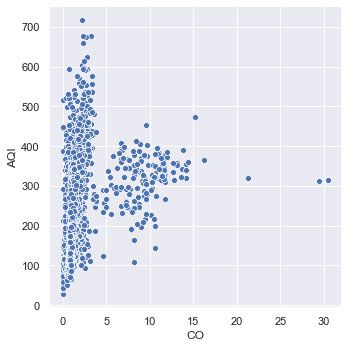

In [10]:
sns.relplot(x = 'CO', y = 'AQI', data = data_1)

In [11]:
data_2 = data.copy()
data_2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [12]:
data_2 = data_2.drop(["PM2.5", "PM10", "NO2","NOx","CO","NO","SO2","O3","Benzene","Toluene","Xylene","AQI_Bucket"],
                 axis = 1, inplace = False)
data_2

,City,Date,NH3,AQI
10229,Delhi,2015-01-01,33.85,472.0
10230,Delhi,2015-01-02,31.83,454.0
10231,Delhi,2015-01-03,69.55,143.0
10232,Delhi,2015-01-04,130.36,319.0
10233,Delhi,2015-01-05,122.88,325.0
...,...,...,...,...
12233,Delhi,2020-06-27,31.43,112.0
12234,Delhi,2020-06-28,29.27,196.0
12235,Delhi,2020-06-29,27.97,233.0
12236,Delhi,2020-06-30,28.48,114.0


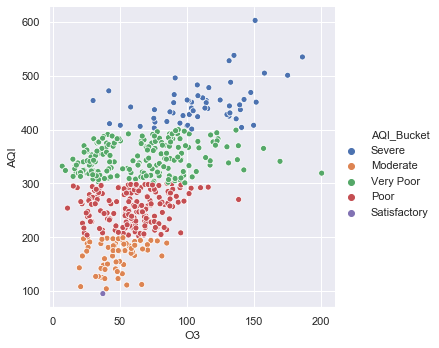

In [13]:
# Hue has been used to show the impact AQI_bucket with other 2 variables
sns.relplot(x = 'O3', y = 'AQI', hue = 'AQI_Bucket', data = data.head(500)) 

## Changing into line graph

<Figure size 21600x21600 with 0 Axes>

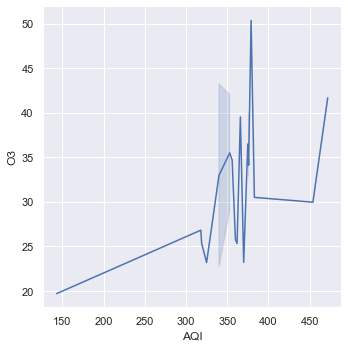

In [14]:
plt.figure(figsize=(300,300))
sns.relplot(x = "AQI", y = "O3", kind = 'line', data = data.head(20))



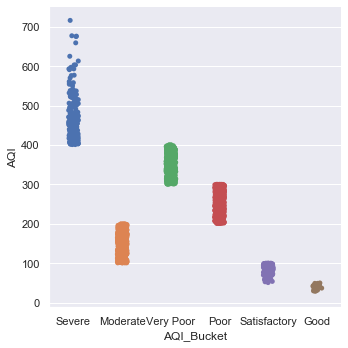

In [15]:
sns.catplot(x = 'AQI_Bucket', y = 'AQI', data=data)

In [16]:
data_3 = data.copy()
data_3= data_3.drop(["PM2.5", "PM10", "NO2","NOx","NO","SO2","O3","Benzene","Toluene","Xylene","AQI_Bucket"],
                 axis = 1, inplace = False)
data_3

,City,Date,NH3,CO,AQI
10229,Delhi,2015-01-01,33.85,15.20,472.0
10230,Delhi,2015-01-02,31.83,9.54,454.0
10231,Delhi,2015-01-03,69.55,10.61,143.0
10232,Delhi,2015-01-04,130.36,11.54,319.0
10233,Delhi,2015-01-05,122.88,9.20,325.0
...,...,...,...,...,...
12233,Delhi,2020-06-27,31.43,0.87,112.0
12234,Delhi,2020-06-28,29.27,0.94,196.0
12235,Delhi,2020-06-29,27.97,0.88,233.0
12236,Delhi,2020-06-30,28.48,0.84,114.0


In [23]:
x = data_3[["NH3", "CO"]]
y = data_3["AQI"]
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
data_3 = data_3.dropna(how = 'any', axis = 0)
data_3

,City,Date,NH3,CO,AQI
10229,Delhi,2015-01-01,33.85,15.20,472.0
10230,Delhi,2015-01-02,31.83,9.54,454.0
10231,Delhi,2015-01-03,69.55,10.61,143.0
10232,Delhi,2015-01-04,130.36,11.54,319.0
10233,Delhi,2015-01-05,122.88,9.20,325.0
...,...,...,...,...,...
12233,Delhi,2020-06-27,31.43,0.87,112.0
12234,Delhi,2020-06-28,29.27,0.94,196.0
12235,Delhi,2020-06-29,27.97,0.88,233.0
12236,Delhi,2020-06-30,28.48,0.84,114.0


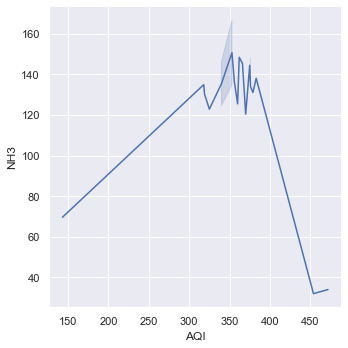

In [81]:
sns.relplot(y = 'NH3', x = 'AQI', kind = 'line', data = data_3.head(20))

# Coefficient

In [25]:
reg.coef_

array([3.309431  , 5.52665744])

# Intercept

In [26]:
reg.intercept_

109.74570755335299

# Calculating R^2

In [27]:
reg.score(x,y)

0.28192690887367444

# Adjusted R^2

$R^2_{Adj} = 1 - (1 - R^2) * \frac {n-1}{n-p-1}$

In [42]:
n = 1991
p = 2
r2 = reg.score(x,y)

In [43]:
r2adj = 1-(1-r2)* (n-1)/(n-p-1)
r2adj

0.28120450133733

In [52]:
r2.round(3)

0.282

In [53]:
r2adj.round(3)

0.281

# F-regression

In [56]:
from sklearn.feature_selection import f_regression

In [57]:
f_regression(x,y)

(array([733.37467696, 167.53696949]),
 array([9.40585662e-138, 7.51425990e-037]))

In [58]:
p_values = f_regression(x,y)[1]
p_values

array([9.40585662e-138, 7.51425990e-037])

In [62]:
p_values.round(3)

array([0., 0.])

# Creating new data frame

In [63]:
summary = pd.DataFrame(data = x.columns.values, columns = ['Gases'])
summary

,Gases
0,NH3
1,CO


In [64]:
summary['Coefficient'] = reg.coef_
summary['P-value'] = p_values.round(3)
summary

,Gases,Coefficient,P-value
0,NH3,3.309431,0.0
1,CO,5.526657,0.0
